
# Travelling Salesman Solution Thought Experiment

### Author: Kevin Lee (k.lee@nyu.edu)

This is an exploration into a potential "solution" to the travelling salesman problem.
This approach is inspired by the algorithms KNN and unsupervised clustering, this one video on neural network optimization of the travelling salesman, and even the concept of gravity.


## Disclaimer:

This approach uses the heuristic:

***An optimal path will have no intersecting segments***

I have not rigorously proved this heuristic with math. However, I believe it will at the very least result in a close approximation of the optimal solution.


## Import packages


In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt


## Create class "Node"

This is what we will use to represent our "cities" and "markers".

In [7]:
class Node():
    def __init__(self, name, pos):
        self.name = name
        self.pos = pos
        self.neighbor = None
        self.locked = False


## Initialize Cities

Here we will initialize our cities, giving them random, unique positions.

In [8]:
# Generate nodes
NUM_NODES = 5

pos_pairs = set()

while len(pos_pairs) < NUM_NODES:
    x_val = random.random()
    y_val = random.random()
    
    pair = (x_val, y_val)
    
    pos_pairs.add(pair)

cities = []

"""start_node, prior_node = None, None

for i, pair in enumerate(pos_pairs):    
    if i == 0:
        newNode = Node(i, pair)
        start_node = newNode
    else:
        newNode = Node(i, pair)
        newNode.neighbor = prior_node

    if i == len(pos_pairs) - 1:
        start_node.neighbor = newNode
    
    prior_node = newNode"""

for i, pair in enumerate(pos_pairs):
    cities.append(Node(i, pair))

(0, (0.17879872821745701, 0.7104794334202373))
(1, (0.902867701304853, 0.18004251867302623))
(2, (0.18402640153366556, 0.8874149133848116))
(3, (0.5316444628498112, 0.5584567843797091))
(4, (0.6617833840113722, 0.05702730166224479))


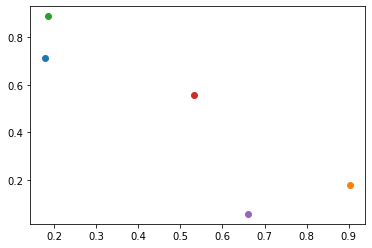

In [11]:
fig = plt.figure(1)

for city in cities:
    print((city.name, city.pos))
    plt.plot(city.pos[0], city.pos[1], 'o')

plt.show()


## Next, we will need to create our markers

These markers will be used to determine the shortest path for all cities.

In order to create the markers, we will first have to determine the appropriate circumcircle to enclose our cities. Using this circumcircle, we will create `NUM_NODES` markers along the circle, or an `NUM_NODES`-gon where each vertex is a marker.

### Challenge

The challenge here is determining the circumcircle for an irregular "polygon" as well as creating a regular n-gon inscribed within the circumcircle.

In [ ]:
# Welzl's Algorithm
# https://en.wikipedia.org/wiki/Smallest-circle_problem

# Creating polygon from circle
# https://math.stackexchange.com/questions/4388838/how-to-find-the-coordinates-of-a-regular-polygon-on-a-circle-given-the-number-of